In [1]:
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import pandas as pd

csv_path = "./preprocessed_groupedDataset"
x_train = pd.read_csv("{}/X_train_grouped.csv".format(csv_path)).drop("matchId", axis=1)
x_val = pd.read_csv("{}/X_val_grouped.csv".format(csv_path)).drop("matchId", axis=1)
x_test = pd.read_csv("{}/X_test_grouped.csv".format(csv_path)).drop("matchId", axis=1)

y_train = pd.read_csv("{}/y_train_grouped.csv".format(csv_path))
y_val = pd.read_csv("{}/y_val_grouped.csv".format(csv_path))
y_test = pd.read_csv("{}/y_test_grouped.csv".format(csv_path))

x_train.head()


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,revives,rideDistance,roadKills,...,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,-0.424084,0.157354,-0.202407,-0.610182,-0.487562,-0.183165,-0.668142,-0.425820,3.050989,-0.067939,...,0,0,0,0,0,0,0,0,1,0
1,6.189015,0.432793,2.309263,2.348845,3.431162,0.180872,2.953926,-0.425820,-0.375138,-0.067939,...,0,0,0,0,0,0,0,0,0,1
2,-0.424084,1.259108,0.475750,-0.187464,-0.487562,0.544910,-0.338863,0.752806,-0.006151,-0.067939,...,0,0,0,0,0,0,0,0,1,0
3,7.015652,4.013491,2.996809,2.348845,3.431162,3.093172,3.941763,-0.425820,1.823947,-0.067939,...,0,0,0,0,0,0,0,0,1,0
4,-0.424084,-0.668961,-0.811108,-0.610182,-0.487562,-0.547203,-0.668142,-0.425820,-0.375138,-0.067939,...,0,0,0,0,0,0,1,0,0,0


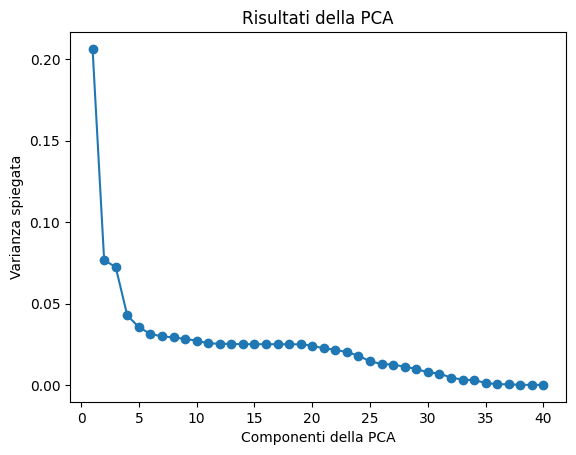

In [2]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_train)
pca = PCA().fit(scaled_data)

plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata')
plt.title("Risultati della PCA")
plt.show()

In [3]:
components = 25
pca = PCA(n_components=components).fit(scaled_data)
X_train_pca = pca.transform(scaled_data)
print("Final input shape train: {}".format(X_train_pca.shape))

scaled_data = scaler.fit_transform(x_val)
x_val_pca = pca.transform(scaled_data)
print("Final input shape val: {}".format(x_val_pca.shape))

scaled_data = scaler.fit_transform(x_test)
x_test_pca = pca.transform(scaled_data)
print("Final input shape test: {}".format(x_test_pca.shape))

Final input shape train: (1297116, 25)
Final input shape val: (324279, 25)
Final input shape test: (405349, 25)


# Neural Models

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Input
from keras.optimizers import Adam

learning_rate = 0.001
n_epochs = 50
batch_size = 1024

model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='relu'))

optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['mean_absolute_error'])
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=n_epochs,batch_size=batch_size)

def plot_loss(history, model_name):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])
  plt.savefig("./models_plots/loss_{}.png".format(model_name))

def plot_mae(history, model_name):
  x_plot = list(range(1,len(history.history["mean_absolute_error"])+1))
  plt.figure()
  plt.title("Mean Absolute Error")
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error')
  plt.plot(x_plot, history.history['mean_absolute_error'])
  plt.plot(x_plot, history.history['val_mean_absolute_error'])
  plt.legend(['Training', 'Validation'])
  plt.savefig("./models_plots/mae_{}.png".format(model_name))

model_dir = "./saved_models"

model_name = "baseline_model_{}e_{}bsize_adam_lr{}".format(n_epochs, batch_size, learning_rate)


plot_loss(history, model_name)
plot_mae(history, model_name)


model.save('{}/{}.h5'.format(model_dir,model_name))

Epoch 1/50
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0218 - mean_absolute_error: 0.0998 - val_loss: 0.0116 - val_mean_absolute_error: 0.0792
Epoch 2/50
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0107 - mean_absolute_error: 0.0753 - val_loss: 0.0102 - val_mean_absolute_error: 0.0734
Epoch 3/50
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0098 - mean_absolute_error: 0.0717 - val_loss: 0.0094 - val_mean_absolute_error: 0.0696
Epoch 4/50
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0093 - mean_absolute_error: 0.0694 - val_loss: 0.0090 - val_mean_absolute_error: 0.0681
Epoch 5/50
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0090 - mean_absolute_error: 0.0680 - val_loss: 0.0087 - val_mean_absolute_error: 0.0667
Epoch 6/50
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0090 - mean_absolute_error: 0.0669 - val_loss: 0.0083 - val_mean_absolute_error: 0.0650
Epoch 7/50
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0084 - mean_absolute_err

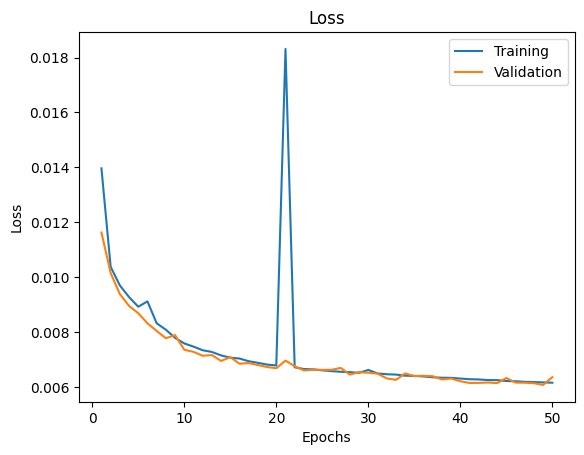

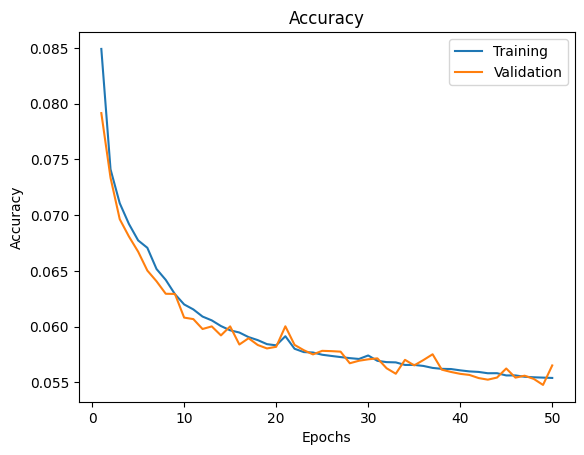

In [ ]:
learning_rate = 0.001
n_epochs = 50
batch_size = 1024

model = Sequential()
model.add(Input(shape=(X_train_pca.shape[1],)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='relu'))

optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['mean_absolute_error'])
history = model.fit(X_train_pca,y_train,validation_data=(x_val_pca,y_val),epochs=n_epochs,batch_size=batch_size)

model_name = "pca_baseline_model_{}e_{}bsize_adam_lr{}".format(n_epochs, batch_size, learning_rate)
model_names.append(model_name)

plot_loss(history, model_name)
plot_mae(history, model_name)

model.save('{}/{}.h5'.format(model_dir,model_name))

Epoch 1/50
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0388 - mean_absolute_error: 0.1269 - val_loss: 0.0113 - val_mean_absolute_error: 0.0785
Epoch 2/50
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0111 - mean_absolute_error: 0.0771 - val_loss: 0.0104 - val_mean_absolute_error: 0.0743
Epoch 3/50
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0103 - mean_absolute_error: 0.0735 - val_loss: 0.0098 - val_mean_absolute_error: 0.0715
Epoch 4/50
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0097 - mean_absolute_error: 0.0711 - val_loss: 0.0093 - val_mean_absolute_error: 0.0696
Epoch 5/50
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0093 - mean_absolute_error: 0.0695 - val_loss: 0.0090 - val_mean_absolute_error: 0.0682
Epoch 6/50
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0091 - mean_absolute_error: 0.0684 - val_loss: 0.0089 - val_mean_absolute_error: 0.0677
Epoch 7/50
1267/1267 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0088 - mean_absolute_err

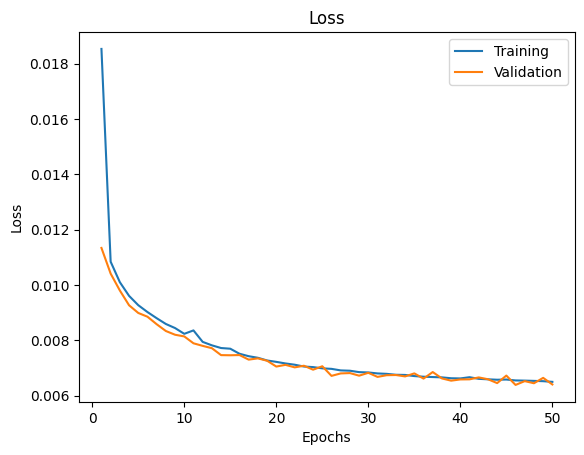

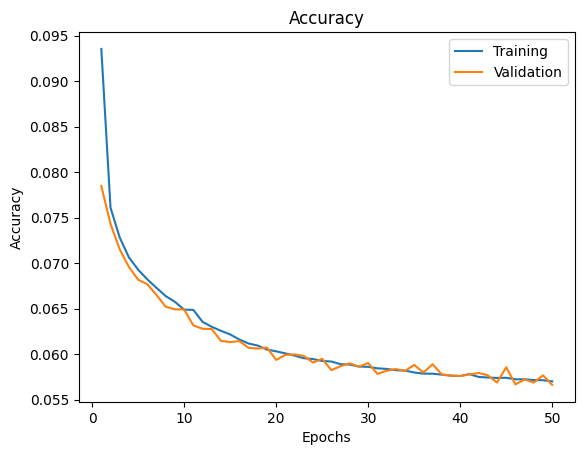

In [ ]:
learning_rate = 0.001
n_epochs = 50
batch_size = 1024
model = Sequential()
model.add(Input(shape=(X_train_pca.shape[1],)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='relu'))

optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['mean_absolute_error'])
history = model.fit(X_train_pca,y_train,validation_data=(x_val_pca,y_val),epochs=n_epochs,batch_size=batch_size)

model_name = "pca_baseline_model_reduced_{}e_{}bsize_adam_lr{}".format(n_epochs, batch_size, learning_rate)


plot_loss(history, model_name)
plot_mae(history, model_name)

model.save('{}/{}.h5'.format(model_dir,model_name))

In [6]:
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import mean_squared_error
import os
model_dir = "./saved_models"
model_names = os.listdir(path = model_dir)
for model_name in model_names:
    model_name = model_name.split(".h5")[0]
    model = load_model('{}/{}.h5'.format(model_dir, model_name))
    if("pca" in model_name):
        predictions = np.array(model(x_test_pca))
    else:
        predictions = np.array(model(x_test))
    mse = mean_squared_error(y_test, predictions)
    print("Testing model: {}, saved at: {}".format(model_name, '{}/{}.h5'.format(model_dir, model_name)))
    print("MSE: {}".format(mse))
    print("--------------------------------------------------------")
    

Testing model: baseline_model_50e_1024bsize_adam_lr0.001, saved at: ./saved_models/baseline_model_50e_1024bsize_adam_lr0.001.h5
MSE: 0.004458603914827108
--------------------------------------------------------


Testing model: pca_baseline_model_50e_1024bsize_adam_lr0.001, saved at: ./saved_models/pca_baseline_model_50e_1024bsize_adam_lr0.001.h5
MSE: 0.006381600629538298
--------------------------------------------------------
Testing model: pca_baseline_model_reduced_50e_1024bsize_adam_lr0.001, saved at: ./saved_models/pca_baseline_model_reduced_50e_1024bsize_adam_lr0.001.h5
MSE: 0.006431097164750099
--------------------------------------------------------


# ML models

In [6]:
import numpy as np
print(X_train_pca.shape)
print(x_val_pca.shape)
print(y_train.shape)
print(y_val.shape)
x_train_ml_pca = np.concat([X_train_pca, x_val_pca])
y_train_ml = np.concat([y_train, y_val])
print(x_train_ml_pca.shape)
print(y_train_ml.shape)


(1297116, 25)
(324279, 25)
(1297116, 1)
(324279, 1)
(1621395, 25)
(1621395, 1)


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import pickle
from tqdm import tqdm

def model_building(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    msq = mean_squared_error(y_test, y_pred)
    with open('./Storage/models/{}.pkl'.format(model_name),'wb') as f:
        pickle.dump(model,f)
    return msq

ml_algos = [[SVR(kernel="linear"), "Linear Support Vector"],
            [SVR(kernel="rbf"), "Rbf Support Vector"],
            [RandomForestRegressor(), "Random Forest"],
            [GradientBoostingRegressor(), "Gradient Boosting Regressor"],
            [GaussianNB(), "Naive Bayes"]]


msqs = []
for algo in tqdm(ml_algos):
    model_name = "{}_grouped_dataset_pca".format(algo[1])
    score = model_building(algo[0], model_name, x_train_ml_pca, x_test_pca, y_train_ml, y_test)
    print("{} obtained MSE: {}".format(algo[1], score))
    msqs.append([algo[1], score])

msqs = np.array(msqs)

  0%|          | 0/5 [00:00<?, ?it/s]d:\Uni\primo semestre 5\Progetto Advanced ML\ProgettoAML\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
